# Financial Signal Processing Coursework

Student: Xinyuan Xu

CID: 01183830

Feburary 2020

## 1 Regression Methods

### Question 1.1.1

Text(0.5, 1.0, 'log(price) history of SPX Index')

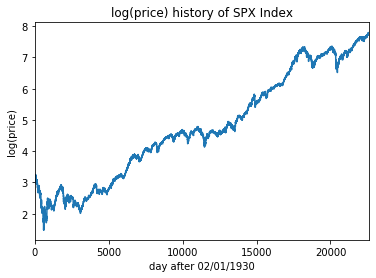

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

px = pd.read_csv("priceData.csv")
# the origial hear of the price column is "SPX Index"
# the space will affect calling of that column, so is replaced by "_" by directly editing the .csv file
# print(px.SPX_Index)
date = px.date
price = px.SPX_Index
price = pd.Series(price)
logpx = np.log(px.SPX_Index)
logpx.plot()

plt.xlabel('day after 02/01/1930')
plt.ylabel('log(price)')
plt.title('log(price) history of SPX Index')

### Question 1.1.2

Text(0.5, 1.0, 'mean of price, window=252days')

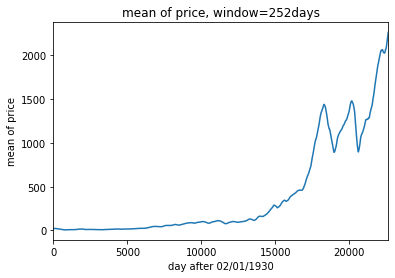

In [2]:
plt.figure()
mean_price = price.rolling(252,min_periods=1).mean()
mean_price.plot()
plt.xlabel('day after 02/01/1930')
plt.ylabel('mean of price')
plt.title('mean of price, window=252days')

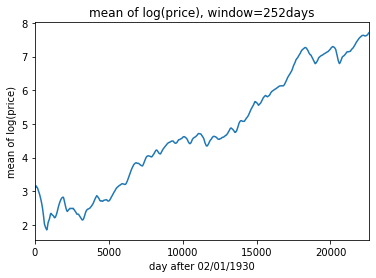

In [3]:
plt.figure()
mean_log_price=logpx.rolling(252, min_periods=1).mean()
mean_log_price.plot()
plt.xlabel('day after 02/01/1930')
plt.ylabel('mean of log(price)')
plt.title('mean of log(price), window=252days')
plt.show()

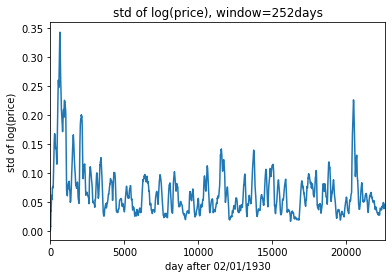

In [4]:
plt.figure()
std_log_price = logpx.rolling(252,min_periods=1).std()
std_log_price.plot()
plt.xlabel('day after 02/01/1930')
plt.ylabel('std of log(price)')
plt.title('std of log(price), window=252days')
plt.show()

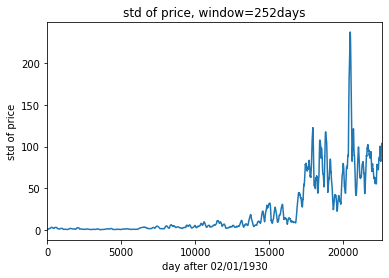

In [5]:
plt.figure()
std_price = price.rolling(252,min_periods=1).std()
std_price.plot()
plt.xlabel('day after 02/01/1930')
plt.ylabel('std of price')
plt.title('std of price, window=252days')
plt.show()

The price time-series is not stationary at all, because the mean and std of both price and log price are always changing with time.

### Question1.1.3

Text(0.5, 1.0, 'mean of log return, window=252days')

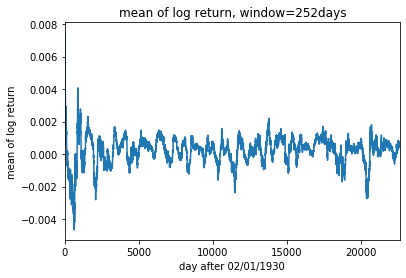

In [6]:
logret = logpx.diff()
simpret = price.pct_change()

plt.figure()
logret.rolling(252,min_periods=1).mean().plot()
plt.xlabel('day after 02/01/1930')
plt.ylabel('mean of log return')
plt.title('mean of log return, window=252days')

Text(0.5, 1.0, 'std of log return, window=252days')

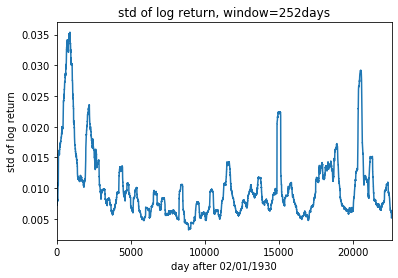

In [7]:
plt.figure()
logret.rolling(252,min_periods=1).std().plot()
plt.xlabel('day after 02/01/1930')
plt.ylabel('std of log return')
plt.title('std of log return, window=252days')

Log return is not stationary. 
Mean of log return is relatively stable around 0, which is more stationary than mean of mean of price or log price.
Similar to std of price or log price, standard deviation of log return could vary between 0.035 and 0.005 during this time peroid, so is not very stationary.

Text(0.5, 1.0, 'mean of simple return, window=252days')

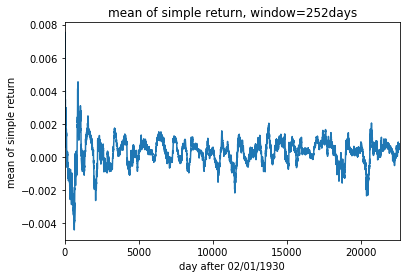

In [8]:
plt.figure()
simpret.rolling(252,min_periods=1).mean().plot()
plt.xlabel('day after 02/01/1930')
plt.ylabel('mean of simple return')
plt.title('mean of simple return, window=252days')

Text(0.5, 1.0, 'std of simple return, window=252days')

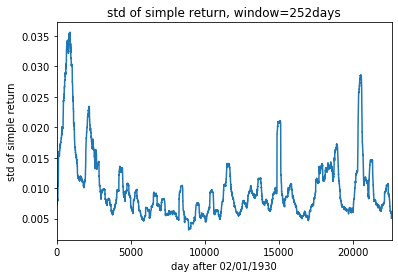

In [9]:
plt.figure()
simpret.rolling(252,min_periods=1).std().plot()
plt.xlabel('day after 02/01/1930')
plt.ylabel('std of simple return')
plt.title('std of simple return, window=252days')

The mean and std of simple return has similar shape with that of log return, because at small return, log return is approximately equal to simple return . As std of simple return also varies a lot, simple return is not stationary as well.

In [10]:
print(logret[100])
print(simpret[100])

0.008288485080056862
0.00832292967124415


## Question 1.1.4
Suitability of Log return over simple return:

1) behavior of log return is symmetric: a 10% increase followed by a 10% decrease in terms of log return means price goes back to the original number; (this is also time daditivity)

2) log function is a monotonic function which preserves "relative ordering"

3) log function compresses the range of data and also conditions the original data probability distribution function

4) if price follows log-normal distribution, then log return is conveniently normal distributed.

5) other advantages include mathematical tractability, numerical stability (safer to add instead of multiply small numbersf) and homomorphic processing.





In [11]:
from scipy import stats
# type(logret) pandas series
logret = logret.dropna()
stats.jarque_bera(logret)

(311807.2704898989, 0.0)

In [12]:
simpret = simpret.dropna()
stats.jarque_bera(simpret)

(284160.67730312835, 0.0)

In [13]:
stats.jarque_bera(logret[:30])

(1.463519177132134, 0.4810617741357005)

In [14]:
stats.jarque_bera(simpret[:30])

(1.4592296470606705, 0.48209464584652406)

In [15]:
stats.jarque_bera(logret[:300])

(35.931594681478074, 1.5759896165867815e-08)

In [16]:
stats.jarque_bera(simpret[:300])

(27.202029022873496, 1.239237221728473e-06)

Over a long time scale (the whole history of data set), the statistics of both log return and simple return are large numbers, meaning they do not follow a normal distribution. Over a period of 30 days, both simple return and log return follows normal distribution. So the assuption of normality only applies in the short term.

### Question 1.1.5 

| Day 0 | Day 1   | Day 2

Price:            1    |  2      |  1

Simple return:    /    |  100%   |  -50%

Log return:       /    |  log(2) |  log(0.5) = -log(2)

This is an example that demonstrates the dame additivity or symmetricity of log return.

### Question 1.16: 

First, Log return should not be used over a long time scale, because it is unreasonable to assume log-mormality over a long period of time. Due to "periodic" financial crisis, financial data is negatively skewed, while log-normal distributions are positively skewed. 

Second, log return could not be used in portforlio, as log return numbers could not be linearly added across asset. For example, log return of Apple stock and Microsoft stock of one day could not be added together to get their total return. Whereas simple returns are linearly additive.

## 1.2 ARMA vs ARIMA models for financial applications

### Question 1.2.1

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
import copy

Text(0.5, 1.0, 'log(closing price) of S&P500 from 2015 to 2019')

<Figure size 432x288 with 0 Axes>

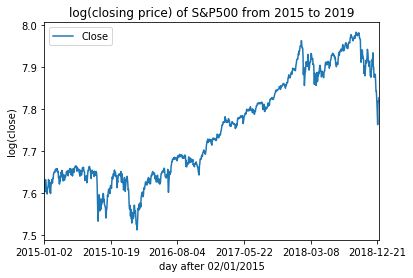

In [18]:
snp = pd.read_csv('snp_500_2015_2019.csv')
snp.set_index(['Date'],inplace=True)
snp_close = snp['Close'].to_frame().apply(np.log)
plt.figure()
snp_close.plot()
plt.xlabel('day after 02/01/2015')
plt.ylabel('log(close)')
plt.title('log(closing price) of S&P500 from 2015 to 2019')

Text(0.5, 1.0, 'mean of s&p500, window=100days')

<Figure size 432x288 with 0 Axes>

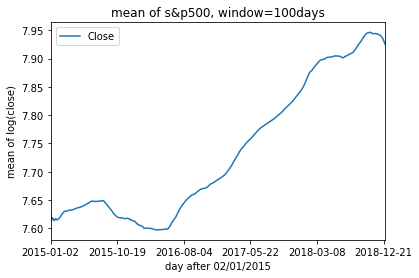

In [19]:
plt.figure()
mean_snp = snp_close.rolling(100,min_periods=1).mean()
mean_snp.plot()
plt.xlabel('day after 02/01/2015')
plt.ylabel('mean of log(close)')
plt.title('mean of s&p500, window=100days')

Text(0.5, 1.0, 'standard deviation of s&p500, window=100days')

<Figure size 432x288 with 0 Axes>

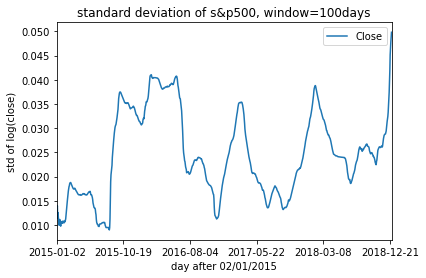

In [20]:
plt.figure()
mean_snp = snp_close.rolling(100,min_periods=1).std()
mean_snp.plot()
plt.xlabel('day after 02/01/2015')
plt.ylabel('std of log(close)')
plt.title('standard deviation of s&p500, window=100days')



The two figures above clearly shows that S&P500 index over this 4 years is non stationary, thus ARIMA model should be used instead of ARMA model.

### Question 1.2.2

In [21]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
ARIMA(snp_arma, order=(1,0,0)).fit().params


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const         7.739998
ar.L1.True    0.997359
dtype: float64

The parameters suggest that 

1) the log closing price centres around 7.74, which could be confirmed by direction observation of snp_close data

2) the closing price of one day is closly correlated to the price of the day before. This of course makes sense, as price rarely moves in large magnitude arbitrarily. By observing the plot below, the AR(1) model prediction follows the true signal quite closly.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


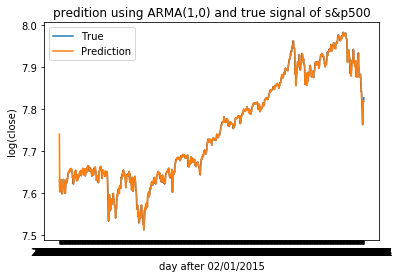

In [22]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
snp_arma['Res']=ARIMA(snp_arma, order=(1,0,0)).fit().resid 
snp_arma['Prediction']=snp_arma['True']-snp_arma['Res']

plt.figure()
line1, = plt.plot(snp_arma['True'],label='True')
line2, = plt.plot(snp_arma['Prediction'],label='Prediction')
plt.legend(handles=[line1, line2])
plt.xlabel('day after 02/01/2015')
plt.ylabel('log(close)')
plt.title('predition using ARMA(1,0) and true signal of s&p500')
plt.show()

In [23]:
MSE = snp_arma['Res'].pow(2).mean()
print(MSE)
# mean square error of ARMA(1,0) model

8.627195459688114e-05


### Question 1.2.3

In [24]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
ARIMA(snp_arima, order=(1,1,0)).fit().params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const           0.000196
ar.L1.D.True   -0.008752
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


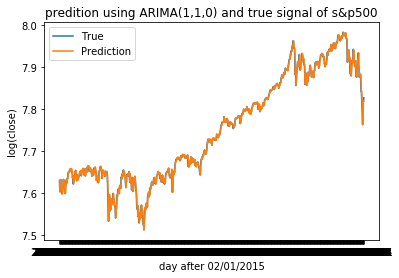

In [25]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
snp_arima['Res']=ARIMA(snp_arima, order=(1,1,0)).fit().resid 
snp_arima['Prediction']=snp_arima['True']-snp_arima['Res']

plt.figure()
line1, = plt.plot(snp_arima['True'],label='True')
line2, = plt.plot(snp_arima['Prediction'],label='Prediction')
plt.legend(handles=[line1, line2])
plt.xlabel('day after 02/01/2015')
plt.ylabel('log(close)')
plt.title('predition using ARIMA(1,1,0) and true signal of s&p500')
plt.show()

In [26]:
MSE = snp_arima['Res'].pow(2).mean()
print(MSE)
# mean square error of ARIMA(1,1,0) model

7.428310856507248e-05


The two models are similarly meaningful since both predict the true signal quite well.
ARMA model works better when the signal has been properly detrended.
ARIMA model has has an integration term thus does require detrending before modeling.

### Question 1.1.4

log function compresses the range of data and also conditions the original data probability distribution function.
The prices originally have changing variance (see figure before), so log function would help suppressing this.
As we can see from previous figure, the log(price) of S&P500 shows a linear growing trend in a previous graph. So the origial price has an exponential growing trend, which has been transformed to linear by log function, thus enables ARIMA model to follow this linear in log price trend. 

## 1.3 Vector Autoregressive Models

### Question 1.3.1
$\textbf{Y}=\textbf{BZ}+\textbf{U}$ 

$\textbf{Y} \in R^{K \times T}$

$\textbf{Y} = \begin{bmatrix} \textbf{y}_1 & \textbf{y}_2 & ... & \textbf{y}_T \end{bmatrix}$ 

Matrix Y is made up of T columns of $\textbf{y}_t$ representing the output of AR process at time t. Each $\textbf{y}_t$ has K elements in the vector, thus Y has K rows.

$\textbf{B} = \begin{bmatrix} \textbf{c} & \textbf{A}_1 & \textbf{A}_2 & ... & \textbf{A}_p \end{bmatrix}$ 

$\textbf{c}$ is a vector of K constants, invariant of time.

$\textbf{A}_i = \begin{bmatrix} a^i_{1,1} & a^i_{1,2} & ... & a^i_{1,k} \\ a^i_{2,1} & a^i_{2,2} & ... & a^i_{2,k} \\ ... & ... & ... & ... \\ a^i_{k,1} & a^i_{k,2} & ... & a^i_{k,k} \\ \end{bmatrix} $

$i = 1,2, ... , k$

$\textbf{A}_i$ represents the AR coefficients and is a $K \times K$ matrix.

It is clear that each element in $B$ has K rows. $\textbf{c}$ is a column vector of 1 column. Each $\textbf{A}_i$ has K columns and there are P of them, so $\textbf{B} \in R^{K \times (KP+1)}$.

For each column of Y, it can be represented as:
$\textbf{y}_t = \textbf{c} + \textbf{A}_1\textbf{y}_{t-1}  + \textbf{A}_2\textbf{y}_{t-2} + ... + \textbf{A}_p\textbf{y}_{t-p} + \textbf{e}_t$

$\textbf{y}_t = \textbf{B} \begin{bmatrix} 1 \\ \textbf{y}_{t-1} \\ \textbf{y}_{t-2} \\ ... \\ \textbf{y}_{t-p} \end{bmatrix} + \textbf{e}_t 
= \textbf{B} \textbf{z}_t + \textbf{e}_t $

$z_t$ is the past process output vector stacking up under a scalar 1. So it has 1+KxP rows.

$\textbf{Z} = \begin{bmatrix} \textbf{z}_1 & \textbf{z}_2 & ... & \textbf{z}_T \end{bmatrix}$. Therefore $\textbf{Z} \in R^{(KP+1) \times T}$.

$\textbf{U} = \begin{bmatrix} \textbf{e}_1 & \textbf{e}_2 & ... & \textbf{e}_T \end{bmatrix}$

$e_t$ is the process model error at time t and is a K-element vector. Thus $\textbf{U} \in R^{K\times T}$.



### Question 1.3.2 

$\varepsilon = \textbf{Y}-\textbf{BZ}$

For $\textbf{B}_{opt}$, error must be othorgonal to $\textbf{Z}$:    $\textbf{Z}^T \varepsilon = \textbf{0}$.

$\textbf{Z}^T (\textbf{Y}-\textbf{BZ}) = \textbf{0}$

$\textbf{Z}^T \textbf{Y} - \textbf{Z}^T\textbf{B}\textbf{Z}  = \textbf{0}$ or $\textbf{Y} \textbf{Z}^T  = \textbf{B}\textbf{Z}\textbf{Z}^T$ 

Therefore $\textbf{B}_{opt} =\textbf{Y} \textbf{Z}^T (\textbf{Z}\textbf{Z}^T)^{-1} $

### Question 1.3.3
$\textbf{y}_t = \textbf{A}\textbf{y}_{t-1}+\textbf{e}_t$

$\textbf{y}_t = \textbf{A}(\textbf{A}\textbf{y}_{t-2}+\textbf{e}_{t-1})+\textbf{e}_t$

$\textbf{y}_t = \textbf{A}^2\textbf{A}\textbf{y}_{t-2}+\textbf{A}\textbf{e}_{t-1}+\textbf{e}_t$

$||\textbf{y}_t||_2 \approx || \textbf{A}^2||_2 \times || \textbf{y}_{t-2} ||_2 + ||\varepsilon||_2$

The p2 norm, $|| \textbf{A}^2||_2 = \max_i^k (\lambda_i^2)$, where $\lambda_i$ is the one of K eigenvalues of matrix $\textbf{A}$ (A is a sqaure and symmetric matrix).

In order to keep $\textbf{y}_t$  stable, at least $|| \textbf{A}^2||_2 \leq 1$. Therefore $|\lambda_i| \leq 1$ is necessary, for all eigenvalues of matrix A.


### Question 1.3.4

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR

df = pd.read_csv(r'snp_allstocks_2015_2019.csv')
df = df.set_index('Date')

info = pd.read_csv(r'snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)

In [28]:
tickers = ['CAG','MAR','LIN','HCP','MAT']
stocks = df[tickers]
stocks_ma = stocks.rolling(window=66,min_periods=1).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

In [29]:
model = VAR(stocks_detrended)
results = model.fit(1)
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
print(stocks)

                  CAG         MAR         LIN        HCP        MAT
Date                                                               
2015-01-02  27.875486   77.750000         NaN  40.846996  30.469999
2015-01-05  27.571985   75.620003         NaN  41.256832  30.459999
2015-01-06  27.299610   74.669998         NaN  42.040073  29.809999
2015-01-07  27.945526   76.379997         NaN  42.932606  29.910000
2015-01-08  28.552528   78.910004         NaN  42.358833  29.980000
...               ...         ...         ...        ...        ...
2018-12-24  20.959999  100.989998  148.130005  26.770000   9.260000
2018-12-26  21.430000  105.580002  152.740005  27.940001   9.940000
2018-12-27  21.219999  106.629997  156.410004  27.809999   9.980000
2018-12-28  21.180000  107.239998  156.309998  27.879999   9.940000
2018-12-31  21.360001  108.559998  156.039993  27.930000   9.990000

[1006 rows x 5 columns]


In [31]:
print(A)

[[ 0.97022759  0.03311629 -0.08698923  0.00376341  0.01327549]
 [-0.00526079  0.91271878 -0.02948557 -0.01099732  0.00675337]
 [ 0.01326282 -0.0188172   0.82107702 -0.00267192 -0.01369525]
 [-0.08026766 -0.012754   -0.22984883  0.90870322 -0.02529306]
 [ 0.08521642  0.00978876  0.39225905  0.03673742  0.98377705]]


noice that all off diagonal values are approximately 0.
This could suggest that each stock is quite independent from each other.

In [32]:
print(eigA)

[0.99825478+0.j         0.85124731+0.j         0.90337502+0.05525527j
 0.90337502-0.05525527j 0.94025153+0.j        ]


The largest eigenvalue belons to CAG. The smallest eigenvalue belongs to MAR. LIN and HCP has almost the same eigenvalue.

It could make sense to construct a portfolio using these stocks. VAR(1) model fits the 5 stocks quite well so the trend of them are quite easy to track. Long and short decisions could be made depending on whether the stock price has a increasing trend or decreasing trend.

### Question 1.3.5

In [33]:
for sector in info['GICS Sector'].unique():
    tickers= info.loc[info['GICS Sector']==sector]['Symbol'].tolist()
    stocks = df[tickers]

In [34]:
stocks_ma = stocks.rolling(window=66,min_periods=1).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()
model = VAR(stocks_detrended)
results = model.fit(1)
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [35]:
print(stocks)

                  APC        APA       BHGE        COG         CVX  \
Date                                                                 
2015-01-02  82.290001  63.830002  56.169998  30.100000  112.580002   
2015-01-05  75.800003  59.910000  55.160000  28.450001  108.080002   
2015-01-06  75.239998  59.259998  54.990002  28.049999  108.029999   
2015-01-07  76.440002  58.599998  56.470001  28.290001  107.940002   
2015-01-08  78.910004  60.869999  57.029999  28.860001  110.410004   
...               ...        ...        ...        ...         ...   
2018-12-24  40.570000  25.400000  20.480000  22.160000  100.989998   
2018-12-26  43.849998  27.040001  21.520000  23.590000  107.389999   
2018-12-27  43.970001  26.740000  21.480000  23.770000  109.320000   
2018-12-28  43.200001  26.340000  21.440001  22.950001  108.650002   
2018-12-31  43.840000  26.250000  21.500000  22.350000  108.790001   

                   XEC         CXO        COP        DVN       FANG  ...  \
Date         

In [36]:
print(A)

[[ 9.05539244e-01  1.10516148e-02  1.27430556e-03 -1.20511181e-02
  -7.87534968e-02 -4.76046271e-02 -9.78439284e-03 -2.12329623e-02
  -1.23444670e-02 -5.95136687e-03 -1.97885838e-02 -5.04180573e-02
  -3.84435523e-03  1.23797862e-02 -2.08999088e-02 -8.07039464e-03
  -7.16407597e-03 -1.51281105e-02 -3.42644852e-02 -2.22057455e-03
  -1.61109880e-02 -8.09110683e-03 -2.78022753e-02 -3.40108735e-02
  -3.64777023e-02 -5.51594729e-02 -6.68970760e-03  2.36798450e-03
  -4.66258902e-02 -7.61670677e-03]
 [ 4.41804917e-02  9.41548897e-01 -7.25709471e-03 -5.65322981e-03
   4.28108365e-02  2.55284087e-02  3.52205349e-02  2.64033904e-02
   9.88150785e-04 -8.34098749e-03  4.24742512e-02  2.77731855e-02
   8.76634514e-03  3.71085729e-02  3.71433971e-02 -1.27906222e-02
   6.37802406e-03  1.78884473e-03 -5.14742628e-03  2.24218282e-03
   3.78791315e-03  2.86166457e-02  7.99215006e-03  3.83015409e-02
   4.40077584e-03  1.09899292e-03  1.21167323e-02  1.25298039e-02
  -1.38854216e-02  1.56868654e-02]
 [ 1.4

In [37]:
print(eigA)

[0.85128312+0.06747729j 0.85128312-0.06747729j 0.83991778+0.j
 0.86996137+0.05056108j 0.86996137-0.05056108j 0.86937011+0.j
 0.89197014+0.02678096j 0.89197014-0.02678096j 0.90282092+0.04039893j
 0.90282092-0.04039893j 0.91777393+0.04897028j 0.91777393-0.04897028j
 0.91735332+0.j         0.97264723+0.0464787j  0.97264723-0.0464787j
 0.95433701+0.04237971j 0.95433701-0.04237971j 0.93785911+0.j
 0.96252182+0.03027034j 0.96252182-0.03027034j 0.97758519+0.03130794j
 0.97758519-0.03130794j 0.9792577 +0.02342929j 0.9792577 -0.02342929j
 0.98597666+0.j         0.97756501+0.01113046j 0.97756501-0.01113046j
 0.95776805+0.00994676j 0.95776805-0.00994676j 0.97380626+0.j        ]


It is generally not advisable to build a portfolio with stocks all in one sector. Stocks in one sector has generally similar trend in performance, thus if the whole sector is not doing well, the portfolio is hard to do well. Diversity of stocks could help the portfolio construction to be healthy.
However, if there is big confidence that one sector would do well, then it makes sense to invest in that sector.